In [89]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model import make_nn

In [90]:
feature_cols = ["OverallQual", "GrLivArea"]


model = make_nn(2)

model.load_weights("./models/neuralnet")

2023-12-08 19:59:36.562881: W tensorflow/core/util/tensor_slice_reader.cc:98] Could not open ./models/neuralnet: FAILED_PRECONDITION: models/neuralnet; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


ValueError: Received incompatible tensor with shape (20,) when attempting to restore variable with shape (50,) and name dense_36/bias:0.

In [85]:
data = pd.read_csv("./data/test.csv", header=0)
X = data[feature_cols]

In [75]:
X.isnull().sum()

OverallQual    0
GrLivArea      0
dtype: int64

In [76]:
#X["TotalBsmtSF"].fillna(X["TotalBsmtSF"].mean(), inplace=True)
#X["GarageCars"].fillna(X["GarageCars"].mean(), inplace=True)

In [77]:
predictions = model.predict(X)

46/46 [==============================] - 0s 338us/step


In [78]:
pred_data = pd.DataFrame({
    "Id": data["Id"],
    "OverallQual": data["OverallQual"].to_numpy(),
    "GrLivArea": data["GrLivArea"].to_numpy(),
    "SalePrice": predictions.flatten()
})

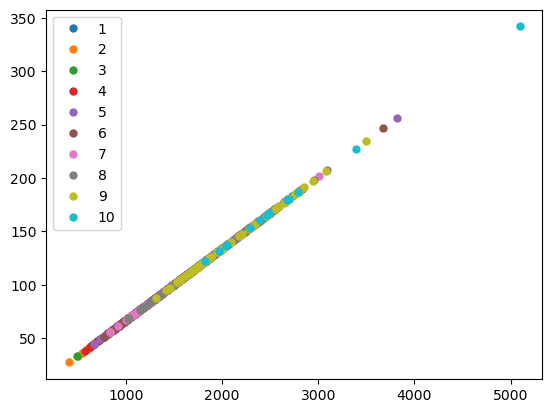

In [79]:
groups = pred_data.groupby("OverallQual")
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group["GrLivArea"], group["SalePrice"], marker='o', linestyle='', ms=5, label=name)
ax.legend()

plt.show()

In [80]:
pred_data[["Id", "SalePrice"]].to_csv("./nn_predictions.csv", index=False)